# Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Импортируем датасет.

In [23]:
data = pd.read_csv('37_25 (6).csv')
X = pd.read_csv('37_25 (6).csv') #Объекты
y = datasets.load_digits().target #Отклики

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:549: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int, copy=False)


Посмотрим, что из себя представляет, например, нулевой объект датасета.

Уменьшим размерность при помощи библиотеки __sklearn__. Отдельно обращаем ваше внимание на параметр __svd_solver__, он отвечает за метод оптимизации. Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели, указанные в задании.

In [26]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([ 15.09236103, -31.5701635 ])

Изобразим первые 100 объектов в виде точек на плоскости. В силу того, что нам известны отклики, отметим одинаковые цифры одинаковым цветом.

Если представить, что отклики нам неизвестны, то картина становится гораздо менее радужной. Объединение объектов в группы интуитивно, конечно, возможно, но с существенными оговорками.

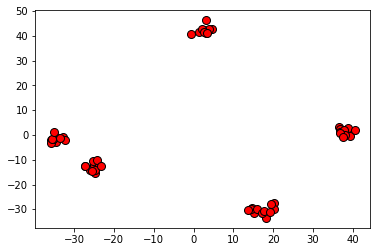

In [43]:
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Для дальнейшего анализа нам удобно будет построить не 2, а все 64 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

In [44]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(X).transform(X)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [45]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.389, 0.705, 0.928, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробный описание произведено в лекции.

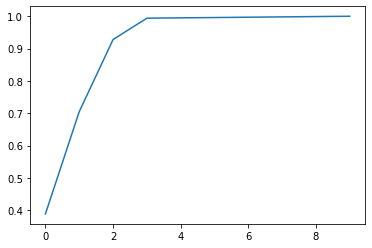

In [46]:
plt.plot(np.arange(10), explained_variance, ls = '-')